<a href="https://colab.research.google.com/github/LuisPeMoraRod/AI-Laboratories/blob/main/Lab8_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para las siguientes funciones:

1.   $f_1(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$, \\
con $x_1, x_2 \in [-4, 4]$
2.   $f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$, \\
con $x_1, x_2 \in [-4, 4]$


### Ejercicio 1
Según tales funciones, grafique las funciones usando la función **meshgrid**.

In [27]:
# import libraries
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
from typing import Callable
from sympy import *
import random

In [28]:
def plot_meshgrid(f: Callable[[np.ndarray, np.ndarray], np.ndarray], x1_range: np.ndarray, x2_range: np.ndarray, title: str):
  x1, x2 = np.meshgrid(x1_range, x2_range)
  z = f(x1, x2)
  fig = plt.figure(figsize=(15, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x1, x2, z, alpha=0.85)
  ax.set_xlabel('$x_{1}$')
  ax.set_ylabel('$x_{2}$')
  ax.set_title(title)


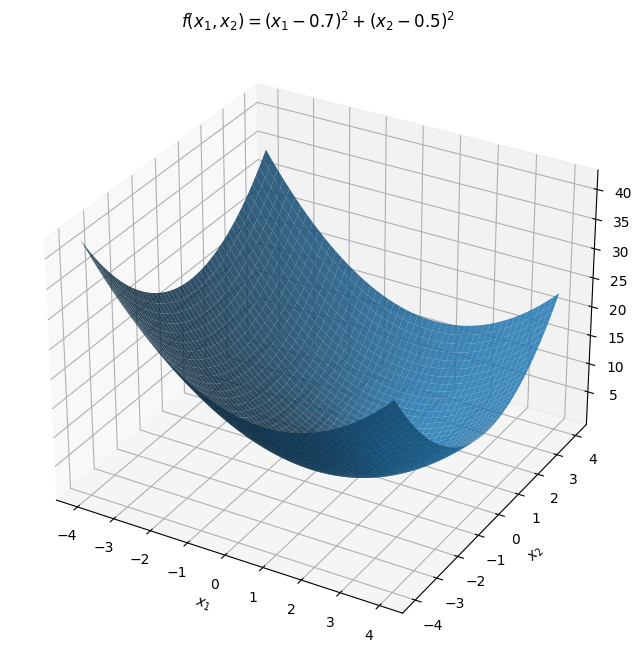

In [29]:
x1_range = np.linspace(-4, 4)
x2_range = np.linspace(-4, 4)

def f1_function(x1: np.ndarray, x2: np.ndarray):
  return (x1-0.7)**2 + (x2 - 0.5)**2

plot_meshgrid(f1_function, x1_range, x2_range, "$f(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$")


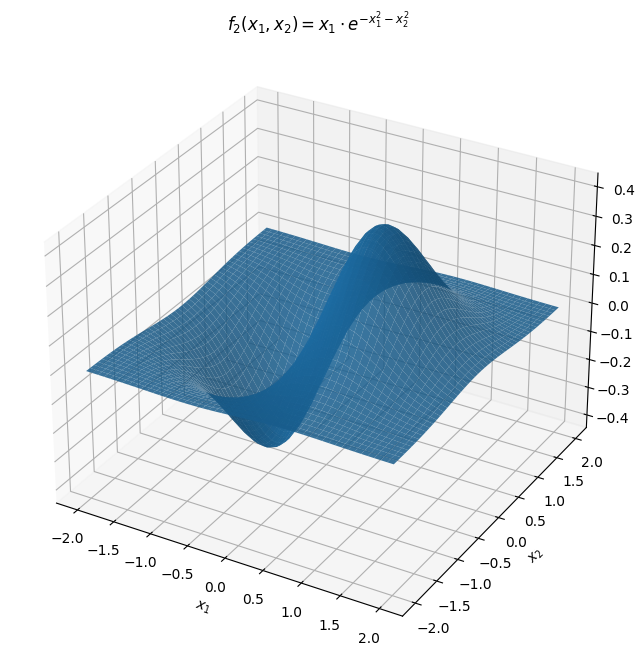

In [30]:
x1_range = np.linspace(-2, 2)
x2_range = np.linspace(-2, 2)

def f2_function(x1: np.ndarray, x2: np.ndarray):
  return x1 * np.exp(-x1**2 - x2**2)

plot_meshgrid(f2_function, x1_range, x2_range, "$f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$")


### Ejercicio 2
Implemente el algoritmo del descenso del gradiente, para cada función.

a. Calcule paso a paso la derivada parcial.

1.   $\nabla f_1 = 
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1}\\ 
\frac{\partial f_1}{\partial x_2}
\end{bmatrix} =
\begin{bmatrix}
2x_1 - 1.4\\ 
2x_2 - 1
\end{bmatrix}$

$\frac{\partial f_1}{\partial x_1} = \frac{\partial \left[ (x_1 - 0.7)^2 + (x_2 - 0.5)^2 \right]}{\partial x_1}$ 

> $ \Rightarrow 2 \cdot (x_1 - 0.7) \cdot \frac{\partial (x_1 - 0.7)}{\partial x_1}$ 

> $ \Rightarrow 2 \cdot (x_1 - 0.7) \cdot 1$ 

> $ \Rightarrow 2x_1 - 1.4$


$\frac{\partial f_1}{\partial x_2} = \frac{\partial \left[ (x_1 - 0.7)^2 + (x_2 - 0.5)^2 \right]}{\partial x_2}$ 

> $ \Rightarrow 2 \cdot (x_2 - 0.5) \cdot \frac{\partial (x_2 - 0.5)}{\partial x_2}$ 

> $ \Rightarrow 2 \cdot (x_2 - 0.5) \cdot 1$ 

> $ \Rightarrow 2x_2 - 1$

---

2.    $\nabla f_2 = 
\begin{bmatrix}
\frac{\partial f_2}{\partial x_1}\\ 
\frac{\partial f_2}{\partial x_2}
\end{bmatrix} =
\begin{bmatrix}
e^{-x_1^2 - x_2^2} - 2 x_1^2 e^{-x_1^2 - x_2^2}\\ 
- 2 x_1 x_2 e^{-x_1^2 - x_2^2}
\end{bmatrix}$

$\frac{\partial f_2}{\partial x_1} = \frac{\partial \left[ x_1 e^{-x_1^2 - x_2^2} \right]}{\partial x_1}$

> $ \Rightarrow \frac{\partial (x_1)}{\partial x_1} \cdot e^{-x_1^2 - x_2^2} + \frac{\partial \left (e^{-x_1^2 - x_2^2} \right )}{\partial x_1} \cdot x_1$ 

> $ \Rightarrow 1 \cdot e^{-x_1^2 - x_2^2} + -2 x_1 e^{-x_1^2 - x_2^2} \cdot x_1$

> $ \Rightarrow e^{-x_1^2 - x_2^2} - 2 x_1^2 e^{-x_1^2 - x_2^2}$

$\frac{\partial f_2}{\partial x_2} = \frac{\partial \left[ x_1 e^{-x_1^2 - x_2^2} \right]}{\partial x_2}$

> $ \Rightarrow x_1 e^{-x_1^2 - x_2^2} \cdot \frac{\partial \left( -x_1^2 - x_2^2 \right)}{\partial x_2}$

> $ \Rightarrow -2 x_1 x_2 e^{-x_1^2 - x_2^2}$

b. Escoja un coeficiente de aprendizaje 𝛼 que permita la convergencia y
reporte los datos y resultados para 100 corridas al menos


> i. Programe el algoritmo del descenso del gradiente para las funciones
dadas al inicio de este documento.

> ii. Indique la cantidad de iteraciones necesarias para converger, en
caso de hacerlo dentro de esas cien corridas.

> iii. Despliegue el punto de convergencia llegado, de igual forma
despliegue el punto al que se llegó en las iteraciones si no se pudo
converger

> iv. Reporte si convergió al punto correcto o no.

> v. Escoja una de las corridas y en una gráfica muestre los puntos
probados por el algoritmo. 



In [31]:
def get_parcial_derivate(f, var: str):
  """
  Computes partial derivate of a function in terms of given variables
  """
  x = symbols(var)
  return diff(f, x)

def get_gradient(f, variables : list):
  """
  Computes the gradient of a given function
  """
  partial_derivates = []
  for var in variables:
    df = get_parcial_derivate(f, str(var))
    partial_derivates.append(df)
  return partial_derivates

def eval_gradient(f_grad: list, variables: list, theta: list):
  """
  Evaluates gradient with current theta values
  """
  grad = []
  subs_theta = []
  for i in range(len(variables)):
    subs_theta.append((variables[i], theta[i]))
  
  for df in f_grad:
    df_theta = df.subs(subs_theta)
    grad.append(df_theta)
  return grad

def gradient_descent(f, variables: list, init: list, learn_rate = 0.1, iter_max = 100, tol = 0.0001):
  """
  Computes gradient descent algorithm
  """
  steps = [init] #history tracking
  theta = init #initial values

  f_gradient = get_gradient(f, variables) #calculate function gradients

  for _ in range(iter_max):
    prev_theta = theta 

    gradients = eval_gradient(f_gradient, variables, theta) #evaluate gradient with current theta

    theta = theta - learn_rate * np.array(gradients) #next theta 
    steps.append(theta)

    diff = theta - prev_theta
    diff = diff.astype(float)

    if norm(diff) < tol: 
      break

  return theta, steps

def plot_min_point(f: Callable[[np.ndarray, np.ndarray], np.ndarray], x1_range: np.ndarray, x2_range: np.ndarray, point: list, title: str):
  x1, x2 = np.meshgrid(x1_range, x2_range)
  z = f(x1, x2)
  fig = plt.figure(figsize=(15, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x1, x2, z, alpha=0.5)
  ax.scatter(point[0], point[1], point[2], c='red')
  ax.text(point[0] + 0.2, point[1], point[2], f'({point[0]}, {point[1]}, {point[2]})')
  ax.set_xlabel('$x_{1}$')
  ax.set_ylabel('$x_{2}$')
  ax.set_title(title)

def plot_steps(f: Callable[[np.ndarray, np.ndarray], np.ndarray], x1_range: np.ndarray, x2_range: np.ndarray, steps: np.ndarray, title: str):
  x1, x2 = np.meshgrid(x1_range, x2_range)
  z = f(x1, x2)
  fig = plt.figure(figsize=(15, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x1, x2, z, alpha=0.4) #plot function surface

  steps = np.transpose(steps)
  x1_points = steps[0].astype(float)
  x2_points = steps[1].astype(float)
  z_points = []
  for i in range(len(x1_points)):
    z_points.append(f(x1_points[i], x2_points[i]))
  ax.scatter(x1_points, x2_points, z_points, c='red') #plot steps

  ax.text(x1_points[0], x2_points[0], z_points[0], f'{1}')
  ax.text(x1_points[-1], x2_points[-1], z_points[-1], f'{len(x1_points) - 1}')

  ax.set_xlabel('$x_{1}$')
  ax.set_ylabel('$x_{2}$')
  ax.set_title(title)

def random_init(min, max):
  x1 = random.uniform(min,max)
  x2 = random.uniform(min,max)
  return [x1, x2]


f1 = (x1 - 0.7)**2 + (x2 - 0.5)**2
Pasos requeridos para converger: 43
Punto al que se convergió: 
	x1 = 0.700 
	x2 = 0.500 
	f1(0.700, 0.500) = 0.0


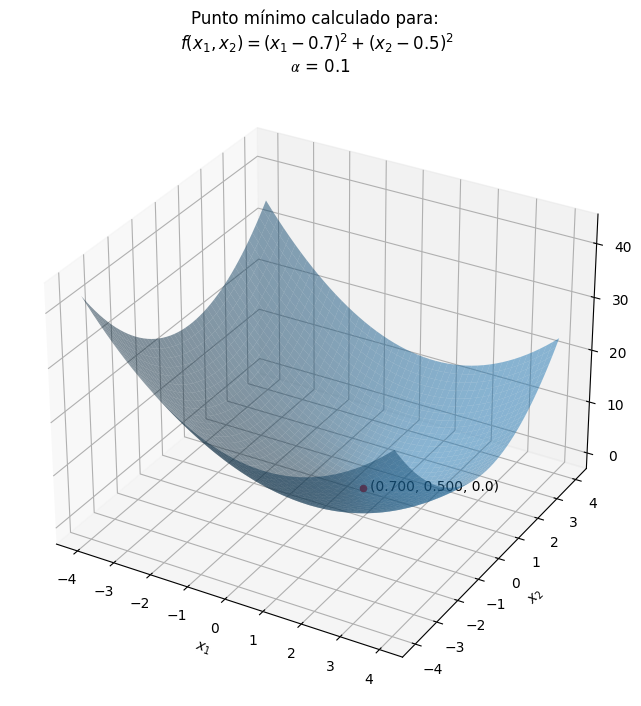

In [32]:
#Gradient descent for f1
dec = 3
x1, x2 = symbols('x1 x2')
f1 = (x1 - 0.7)**2 + (x2 - 0.5)**2

#init_theta_f1 = random_init(-4,4)
init_theta_f1 = [-3,-3]

theta_f1, steps_f1 = gradient_descent(f1, [x1, x2], init_theta_f1)

t_x1 = round(theta_f1[0], dec)
t_x2 = round(theta_f1[1], dec)
t_z = f1.subs([(x1,theta_f1[0]),(x2, theta_f1[1])])
t_z = round(t_z, dec)

print(f'f1 = {f1}')
steps_num = len(steps_f1) - 1
if (steps_num < 100):
  print(f'Pasos requeridos para converger: {steps_num}')
  print(f'Punto al que se convergió: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')
else:
  print('El algoritmo no convergió')
  print(f'Último punto analizado: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')

x1_range = np.linspace(-4, 4)
x2_range = np.linspace(-4, 4)
plot_min_point(f1_function,x1_range, x2_range,[t_x1, t_x2, t_z] ,"Punto mínimo calculado para: \n$f(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$ \n $𝛼$ = 0.1")


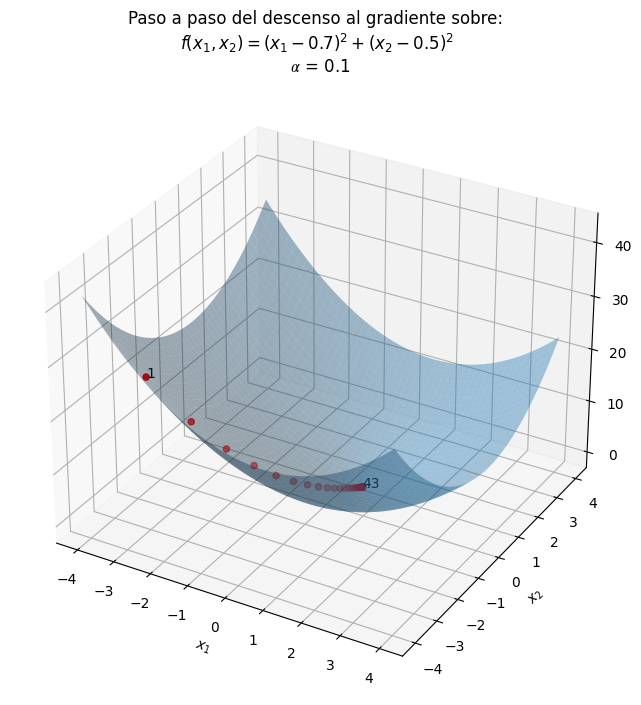

In [33]:
#step by step plot
plot_steps(f1_function,x1_range, x2_range, steps_f1 ,"Paso a paso del descenso al gradiente sobre: \n$f(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$ \n $𝛼$ = 0.1")




f2 = x1*exp(-x1**2 - x2**2)
Pasos requeridos para converger: 71
Punto al que se convergió: 
	x1 = -0.7071 
	x2 = -0.0004 
	f1(-0.7071, -0.0004) = -0.4289


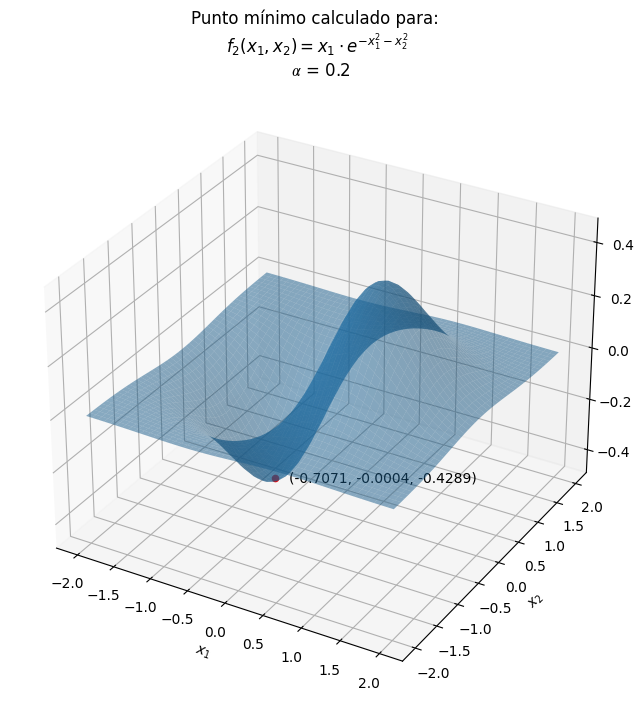

In [34]:
#Gradient descent for f2
dec = 4
x1, x2 = symbols('x1 x2')
f2 = x1 * exp(- (x1)**2 - (x2)**2)

#init_theta_f2 = random_init(-2,2)
init_theta_f2 = [-1.5,-1.5]

learn_rate = 0.2
theta_f2, steps_f2 = gradient_descent(f2, [x1, x2], init_theta_f2, tol=0.0001, learn_rate=learn_rate)

t_x1 = round(theta_f2[0], dec)
t_x2 = round(theta_f2[1], dec)
t_z = f2.subs([(x1,theta_f2[0]),(x2, theta_f2[1])])
t_z = round(t_z, dec)

print(f'\n\nf2 = {f2}')
steps_num = len(steps_f2) - 1
if (steps_num < 100):
  print(f'Pasos requeridos para converger: {steps_num}')
  print(f'Punto al que se convergió: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')
else:
  print('El algoritmo no convergió')
  print(f'Último punto analizado: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')

x1_range = np.linspace(-2, 2)
x2_range = np.linspace(-2, 2)
plot_min_point(f2_function,x1_range, x2_range,[t_x1, t_x2, t_z] ,"Punto mínimo calculado para: \n$f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$ \n $𝛼$ = %.1f" % learn_rate)



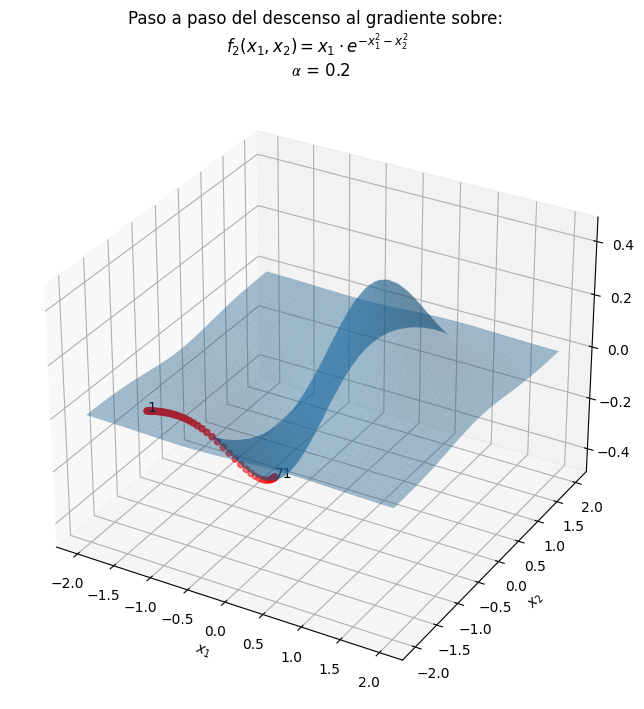

In [35]:
# step by step plot
plot_steps(f2_function,x1_range, x2_range, steps_f2 ,"Paso a paso del descenso al gradiente sobre: \n$f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$ \n $𝛼$ = %.1f" % learn_rate)

c. Escoja un 𝛼 relativamente grande respecto al valor seleccionado y aplique
el punto 2.b para este valor.
> i. ¿Qué sucede? ¿Permite un 𝛼 muy grande la convergencia? 

> ii. Saque conclusiones

f1 = (x1 - 0.7)**2 + (x2 - 0.5)**2
Pasos requeridos para converger: 8
Punto al que se convergió: 
	x1 = 0.7000 
	x2 = 0.5000 
	f1(0.7000, 0.5000) = 0.0


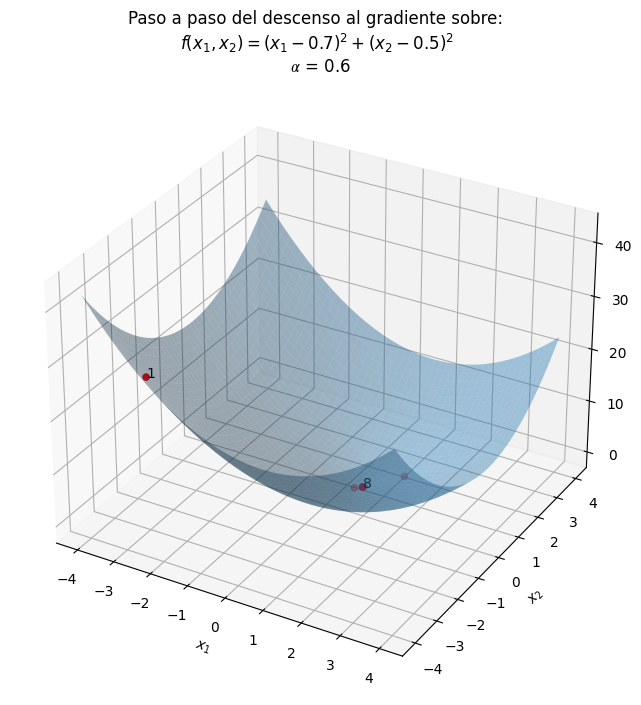

In [36]:
learn_rate = 0.6
theta_f1, steps_f1 = gradient_descent(f1, [x1, x2], init_theta_f1, learn_rate = learn_rate)

t_x1 = round(theta_f1[0], dec)
t_x2 = round(theta_f1[1], dec)
t_z = f1.subs([(x1,theta_f1[0]),(x2, theta_f1[1])])
t_z = round(t_z, dec)

print(f'f1 = {f1}')
steps_num = len(steps_f1) - 1
if (steps_num < 100):
  print(f'Pasos requeridos para converger: {steps_num}')
  print(f'Punto al que se convergió: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')
else:
  print('El algoritmo no convergió')
  print(f'Último punto analizado: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')

x1_range = np.linspace(-4, 4)
x2_range = np.linspace(-4, 4)
plot_steps(f1_function,x1_range, x2_range, steps_f1 ,"Paso a paso del descenso al gradiente sobre: \n$f(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$ \n $𝛼$ = %.1f" % learn_rate)




f2 = x1*exp(-x1**2 - x2**2)
El algoritmo no convergió
Último punto analizado: 
	x1 = -0.2529 
	x2 = 0.0 
	f1(-0.2529, 0.0) = -0.2372


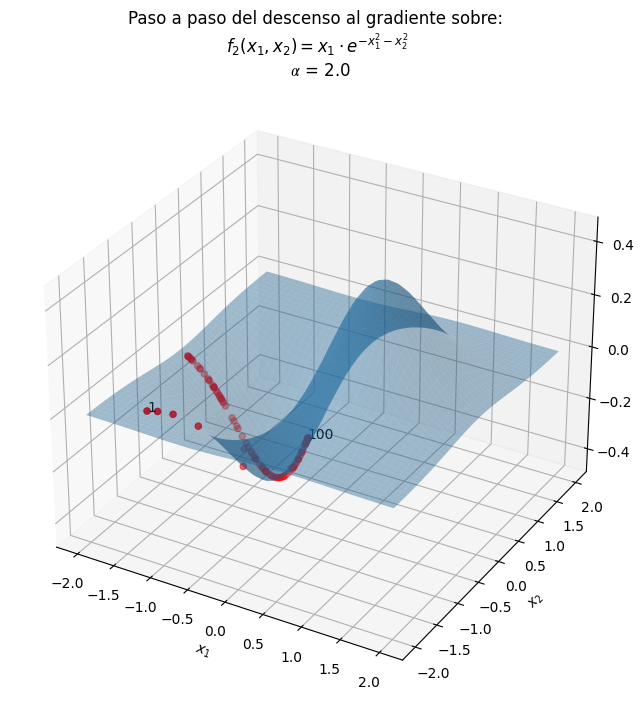

In [37]:
learn_rate = 2
theta_f2, steps_f2 = gradient_descent(f2, [x1, x2], init_theta_f2, tol=0.0001, learn_rate=learn_rate)

t_x1 = round(theta_f2[0], dec)
t_x2 = round(theta_f2[1], dec)
t_z = f2.subs([(x1,theta_f2[0]),(x2, theta_f2[1])])
t_z = round(t_z, dec)

print(f'\n\nf2 = {f2}')
steps_num = len(steps_f2) - 1
if (steps_num < 100):
  print(f'Pasos requeridos para converger: {steps_num}')
  print(f'Punto al que se convergió: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')
else:
  print('El algoritmo no convergió')
  print(f'Último punto analizado: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')

x1_range = np.linspace(-2, 2)
x2_range = np.linspace(-2, 2)

plot_steps(f2_function,x1_range, x2_range, steps_f2 ,"Paso a paso del descenso al gradiente sobre: \n$f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$ \n $𝛼$ = %.1f" % learn_rate)


Analizando los resultados anteriores, se considera que para $f_1$ se había utilizado inicialmente una taza de aprendizaje $α = 0.1$, con la cual el algoritmo convergió al valor mínimo de la función en **43 iteraciones**. Se decidió aumentar $α$ a un valor 6 veces más grande para evaluar el comportamiento (manteniendo el mismo punto inicial). En este caso, el rendimiento del cálculo mejoró al necesitar de **8 iteraciones** para converger. El incrementó del tamaño de los "saltos" que va dando el algoritmo, favoreció el llegar más rápido al punto mínimo para estas condiciones en específico; sin embargo, eso no quiere decir que siempre que se aumente la taza de aprendizaje se mejorará el rendimiento, como se demostrará para la segunda función.

Para el caso de $f_2$, en la primera ejecución del algoritmo se usó un $α = 0.2$, con el cual se convergió al punto mínimo luego de **71 iteraciones**. Ahora, se tomó un valor 20 veces mayor para re-evaluar el comportamiento del algoritmo. Con el $α = 2$, se observó que el algoritmo no convergió a un valor luego de 100 iteraciones. Analizando la gráfica correspondiente, se puede ver cómo el tamaño de los "saltos" es demasiado grande como para permitir la convergencia en el punto mínimo para esas condiciones de concavidad. El punto analizado iba alternando entre cada lado de la concavidad con pendientes opuestas, al punto que en las 100 iteraciones definidas como límite máximo, no se alcanzó la convergencia.

De esta forma, se puede concluir que la idoneidad del $α$ definido para ejecutar el algoritmo del descenso al gradiente, va a depender de las características de la función analizada. Puede ser el caso que aumentar su tamaño favorezca a la convergencia, aunque por lo general, si se utiliza un valor demasiado grande, el algoritmo va a tender a ser incapaz de converger a un punto mínimo.

d. Escoja un 𝛼 relativamente pequeño respecto al valor seleccionado y aplique
el punto 2.b para este valor.
> i. ¿Qué sucede? ¿Permite un 𝛼 muy pequeño la convergencia? 

> ii. Saque conclusiones

f1 = (x1 - 0.7)**2 + (x2 - 0.5)**2
El algoritmo no convergió
Último punto analizado: 
	x1 = 0.2093 
	x2 = 0.0358 
	f1(0.2093, 0.0358) = 0.4562


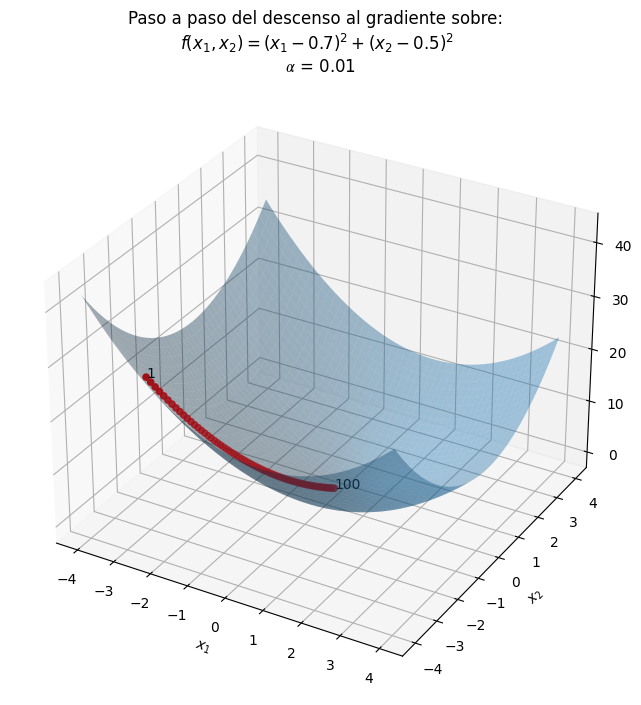

In [38]:
learn_rate = 0.01
theta_f1, steps_f1 = gradient_descent(f1, [x1, x2], init_theta_f1, learn_rate = learn_rate)

t_x1 = round(theta_f1[0], dec)
t_x2 = round(theta_f1[1], dec)
t_z = f1.subs([(x1,theta_f1[0]),(x2, theta_f1[1])])
t_z = round(t_z, dec)

print(f'f1 = {f1}')
steps_num = len(steps_f1) - 1
if (steps_num < 100):
  print(f'Pasos requeridos para converger: {steps_num}')
  print(f'Punto al que se convergió: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')
else:
  print('El algoritmo no convergió')
  print(f'Último punto analizado: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')

x1_range = np.linspace(-4, 4)
x2_range = np.linspace(-4, 4)
plot_steps(f1_function,x1_range, x2_range, steps_f1 ,"Paso a paso del descenso al gradiente sobre: \n$f(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$ \n $𝛼$ = %.2f" % learn_rate)




f2 = x1*exp(-x1**2 - x2**2)
El algoritmo no convergió
Último punto analizado: 
	x1 = -1.0846 
	x2 = -0.9331 
	f1(-1.0846, -0.9331) = -0.1400


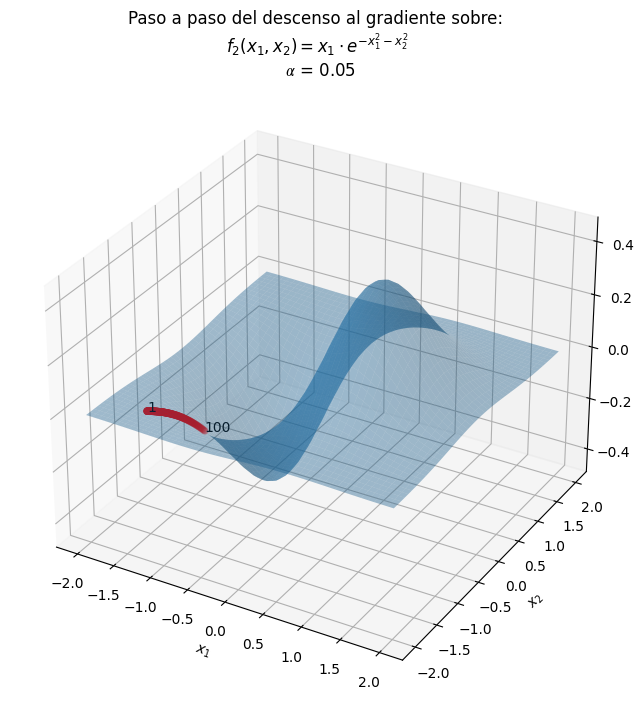

In [39]:
learn_rate = 0.05
theta_f2, steps_f2 = gradient_descent(f2, [x1, x2], init_theta_f2, tol=0.0001, learn_rate=learn_rate)

t_x1 = round(theta_f2[0], dec)
t_x2 = round(theta_f2[1], dec)
t_z = f2.subs([(x1,theta_f2[0]),(x2, theta_f2[1])])
t_z = round(t_z, dec)

print(f'\n\nf2 = {f2}')
steps_num = len(steps_f2) - 1
if (steps_num < 100):
  print(f'Pasos requeridos para converger: {steps_num}')
  print(f'Punto al que se convergió: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')
else:
  print('El algoritmo no convergió')
  print(f'Último punto analizado: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')

x1_range = np.linspace(-2, 2)
x2_range = np.linspace(-2, 2)

plot_steps(f2_function,x1_range, x2_range, steps_f2 ,"Paso a paso del descenso al gradiente sobre: \n$f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$ \n $𝛼$ = %.2f" % learn_rate)


Para el caso de $f_1$, al disminuir el valor de la taza de aprendizaje y hacerlo 10 veces más pequeño que el valor original de $0.1$, no se logró alcanzar la convergencia en el punto mínimo en menos de 100 iteraciones. Si se observa la gráfica para este caso, el historial de puntos analizados indica que la dirección que se llevaba hasta el punto de la iteración número 100 era la correcta y que incluso invita a presumir que los resultados alcanzados tendrían mayor precisión, sin embargo, el tamaño de los saltos era tan pequeño que iba a requerir de mayor repeteciones para converger a un valor. Lo mismo ocurrió para $f_2$ cuando se disminuyó el $α$ de 0.2 a 0.05. 

Al igual que para el ejercicio de aumentar la taza de aprendizaje, es posible que utilizar un valor menor pueda mejorar el rendimiento del algoritmo, pero eso va a depender de las condiciones específicas de $α$ y de la función analizada.Ahora bien, si se utilizan valores demasiado pequeños, por lo general se va a necesitar de una mayor cantidad de iteraciones para la convergencia, lo que se traduce en mayor recursos de procesamiento.